# 1st question

1) Delivery_time -> Predict delivery time using sorting time 


In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [309]:
df.shape

(21, 2)

In [312]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [313]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [315]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [316]:
df=df.rename(columns={"Delivery Time":"hike","Sorting Time":"years"})
df

,hike,years
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [317]:
df[df.duplicated]

,hike,years


In [318]:
Q1=df['hike'].quantile(0.25)
Q1

13.5

In [320]:
Q3=df['hike'].quantile(0.75)
Q3

19.75

In [321]:
IQR=Q3-Q1
IQR

6.25

In [322]:
upper_extreme=Q3+1.5*IQR
upper_extreme

29.125

In [323]:
lower_extreme=Q1-1.5*IQR
lower_extreme

4.125

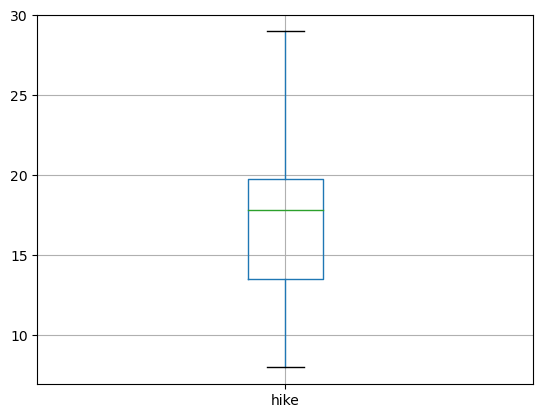

In [324]:
df.boxplot('hike')
plt.show()

In [325]:
df_outliers=df[(df.hike<lower_extreme)|(df.hike>upper_extreme)]
df_outliers

,hike,years


In [326]:
df_no_outliers=df[(df.hike>lower_extreme)|(df.hike<upper_extreme)]
df_no_outliers

,hike,years
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


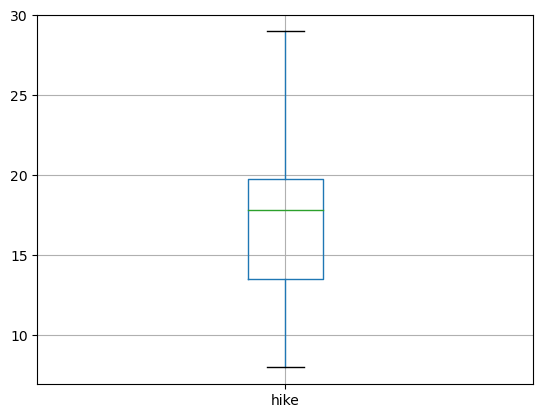

In [327]:
df_no_outliers.boxplot('hike')
plt.show()

In [328]:
corr=df[['hike','years']].corr()
corr

,hike,years
hike,1.000000,0.825997
years,0.825997,1.000000


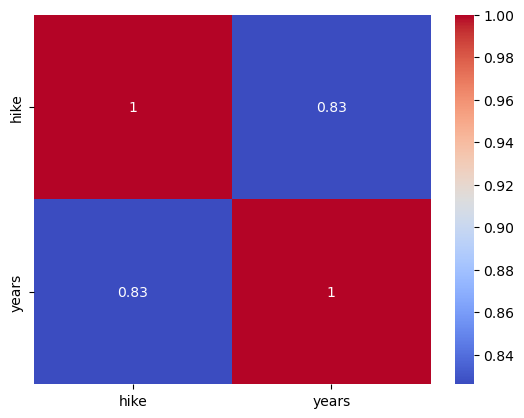

In [329]:
import seaborn as sns
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()


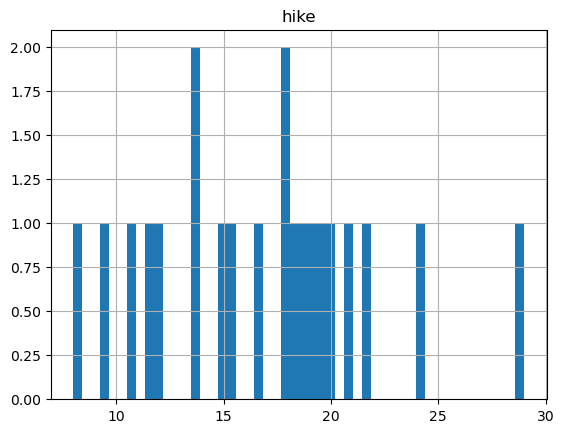

In [334]:
df.hist('hike',bins=50)
plt.show()

In [336]:
df['Std_hike']=std_scaler.fit_transform(df[['hike']])
df

,hike,years,Std_hike
0,21.00,10,0.849867
1,13.50,4,-0.664490
2,19.75,6,0.597474
3,24.00,9,1.455610
4,29.00,10,2.465181
5,15.35,6,-0.290949
6,19.00,7,0.446038
7,9.50,3,-1.472148
8,17.90,10,0.223933
9,18.75,9,0.395560


In [337]:
target=df[['hike']]
target

,hike
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [339]:
features=df[['years']]
features

,years
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [345]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [346]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 1)
(6, 1)
(15, 1)
(6, 1)


In [347]:
x_test

,years
18,2
20,5
11,4
19,7
13,3
6,7


In [348]:
x_train

,years
0,10
1,4
9,9
17,7
12,7
5,6
2,6
4,10
14,3
10,8


In [349]:
y_train

,hike
0,21.00
1,13.50
9,18.75
17,18.11
12,16.68
5,15.35
2,19.75
4,29.00
14,12.03
10,19.83


In [350]:
y_test

,hike
18,8.00
20,21.50
11,10.75
19,17.83
13,11.50
6,19.00


In [351]:
lin_reg=LinearRegression()

In [352]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [353]:
y_pred=lin_reg.predict(x_test)
y_pred

array([[ 9.90647059],
       [14.71617647],
       [13.11294118],
       [17.92264706],
       [11.50970588],
       [17.92264706]])

In [354]:
error=y_test-y_pred
error

,hike
18,-1.906471
20,6.783824
11,-2.362941
19,-0.092647
13,-0.009706
6,1.077353


In [355]:
B0=lin_reg.intercept_
B0

array([6.7])

In [356]:
B1=lin_reg.coef_
B1

array([[1.60323529]])

In [357]:
B0+(B1*5)

array([[14.71617647]])

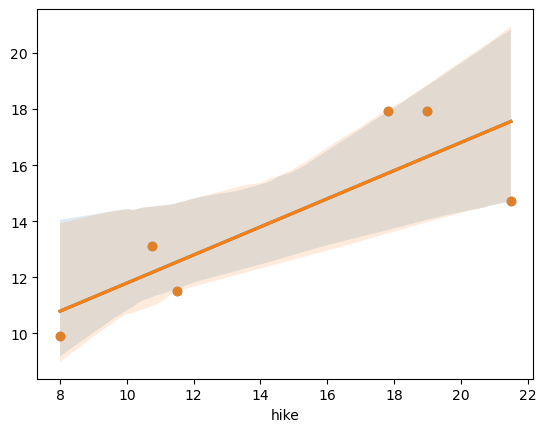

In [360]:
import seaborn as sns
sns.regplot(data=df,x=y_test,y=y_pred)
plt.show()

In [361]:
r2_score(y_test,y_pred)

0.6116113859323284

In [362]:
sse=(y_test-y_pred)**2
sse

,hike
18,3.634630
20,46.020262
11,5.583491
19,0.008583
13,0.000094
6,1.160689


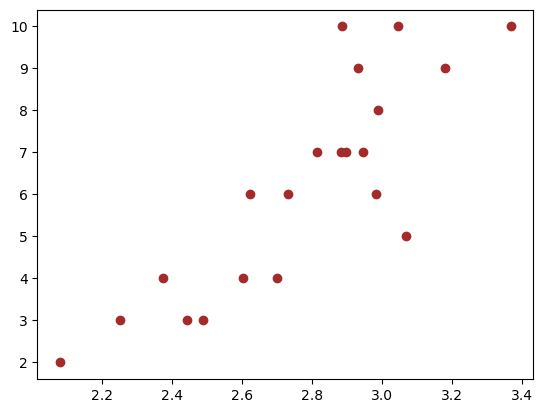

In [363]:
plt.scatter(x = np.log(df['hike']), y = df['years'], color = 'brown')
np.corrcoef(np.log(df['hike']),df['years'] )
plt.show()

In [364]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.14e-20
Time:                        18:33:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# square  transformation of data

In [372]:
model_1=sfa.ols('np.sqrt(hike)~np.sqrt(years)',data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.sqrt(hike)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           8.48e-07
Time:                        18:42:00   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(years)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# log transformation of data

In [373]:
model_2=sfa.ols('np.log(hike)~np.log(years)',data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(hike)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.60e-07
Time:                        18:42:05   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7420      0.133     13.086      0.000       1.463       2.021
np.log(years)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# model building

In [376]:
model=sfa.ols(formula='hike~years',data=df).fit()
model

# model testing

In [378]:
model.params

Intercept    6.582734
years        1.649020
dtype: float64

In [383]:
model.tvalues, model.pvalues

(Intercept    3.823349
 years        6.387447
 dtype: float64,
 Intercept    0.001147
 years        0.000004
 dtype: float64)

In [379]:
model.rsquared

0.6822714748417231

In [380]:
model.rsquared_adj

0.6655489208860244

In [382]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        18:48:33   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
years          1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [384]:
from sklearn.metrics import mean_squared_error

In [386]:
model1_pred_y=np.square(model_1.predict(df['years']))
model2_pred_y=np.exp(model_2.predict(df['years']))

In [387]:
model1_rmse=np.sqrt(mean_squared_error(df['hike'],model1_pred_y))
model2_rmse=np.sqrt(mean_squared_error(df['hike'],model2_pred_y))
print('model=',np.sqrt(model.mse_resid),'\n' 'model1=',model1_rmse,'\n' 'model2=',model2_rmse)


model= 2.9349037688901394 
model1= 2.762294279320867 
model2= 2.7458288976145497


In [388]:
rmse={'model':np.sqrt(model.mse_resid),'model1':model1_rmse, 'model2':model2_rmse}
min(rmse,key=rmse.get)

'model2'

# model prediction

In [390]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [393]:
data_pred=pd.DataFrame(new_data,columns=['years'])
data_pred

,years
0,5
1,8


In [394]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# 2nd question

2) Salary_hike -> Build a prediction model for Salary_hike


In [241]:
df1=pd.read_csv('Salary_Data.csv')
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA Process

In [242]:
df1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [243]:
df1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [244]:
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [245]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [246]:
df1.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [247]:
Q1=df1['Salary'].quantile(0.25)
Q1

56720.75

In [248]:
Q3=df1['Salary'].quantile(0.75)
Q3

100544.75

In [249]:
IQR=Q3-Q1
IQR

43824.0

In [250]:
upper_extreme=Q3+1.5*IQR
upper_extreme

166280.75

In [251]:
lower_extreme=Q1-1.5*IQR
lower_extreme

-9015.25

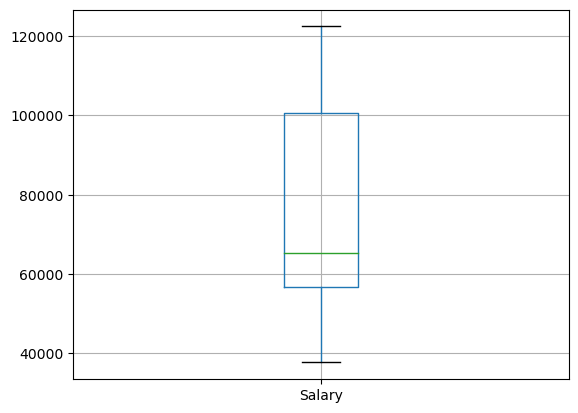

In [252]:
df1.boxplot('Salary')
plt.show()

In [253]:
df1_outliers=df1[(df1.Salary<lower_extreme)|(df1.Salary>upper_extreme)]
df1_outliers

,YearsExperience,Salary


In [254]:
df1_no_outliers=df1[(df1.Salary>lower_extreme)&(df1.Salary<upper_extreme)]
df1_no_outliers

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


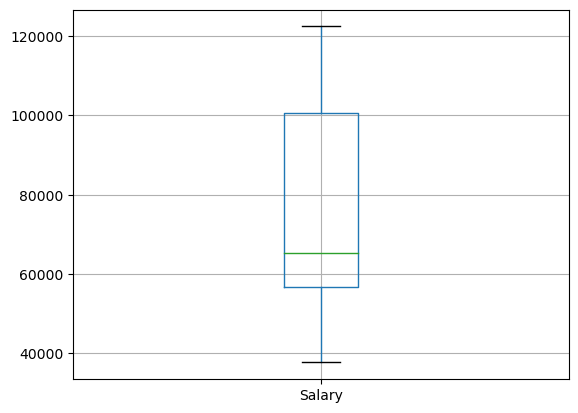

In [255]:
df1_no_outliers.boxplot('Salary')
plt.show()

In [256]:
corr=df1[['YearsExperience','Salary']].corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


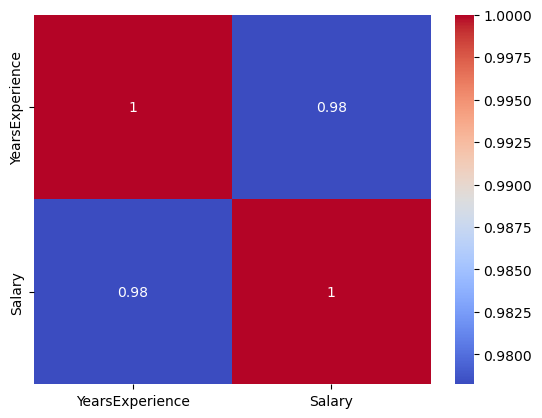

In [257]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

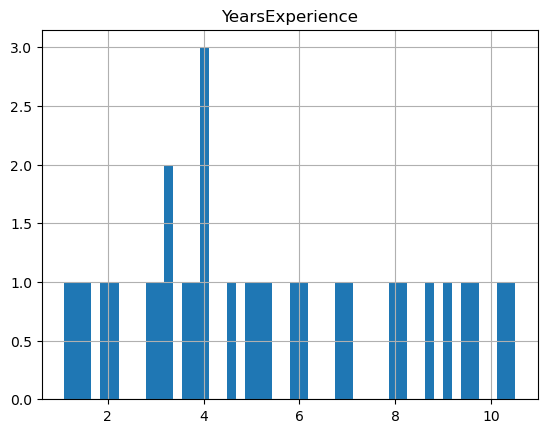

In [258]:
df1.hist('YearsExperience',bins=50)
plt.show()

In [259]:
#scalling data
df1['Std_Salary']=std_scaler.fit_transform(df1[['Salary']])
df1

,YearsExperience,Salary,Std_Salary
0,1.1,39343.0,-1.360113
1,1.3,46205.0,-1.105527
2,1.5,37731.0,-1.419919
3,2.0,43525.0,-1.204957
4,2.2,39891.0,-1.339781
5,2.9,56642.0,-0.718307
6,3.0,60150.0,-0.588158
7,3.2,54445.0,-0.799817
8,3.2,64445.0,-0.428810
9,3.7,57189.0,-0.698013


In [260]:
target1=df1[['Salary']]
target1

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [261]:
features1=df1[['YearsExperience']]
features1

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [262]:
x_train,x_test,y_train,y_test=train_test_split(features1,target1,train_size=0.75,random_state=100)

In [263]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 1)
(8, 1)
(22, 1)
(8, 1)


In [264]:
x_test

,YearsExperience
9,3.7
26,9.5
28,10.3
13,4.1
5,2.9
12,4.0
27,9.6
25,9.0


In [265]:
#simple Linear Regression
lin_reg=LinearRegression()

In [266]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [267]:
y_pred=lin_reg.predict(x_test)
y_pred

array([[ 61553.5935156 ],
       [117565.50786941],
       [125291.28915959],
       [ 65416.48416069],
       [ 53827.81222542],
       [ 64450.76149941],
       [118531.23053068],
       [112736.89456304]])

In [268]:
error=y_test-y_pred
error

,Salary
9,-4364.593516
26,-596.507869
28,-2900.289160
13,-8335.484161
5,2814.187775
12,-7493.761499
27,-5896.230531
25,-7154.894563


In [269]:
B0=lin_reg.intercept_
B0

array([25821.85504851])

In [270]:
B1=lin_reg.coef_
B1

array([[9657.22661273]])

In [271]:
B0+(B1*9.5)

array([[117565.50786941]])

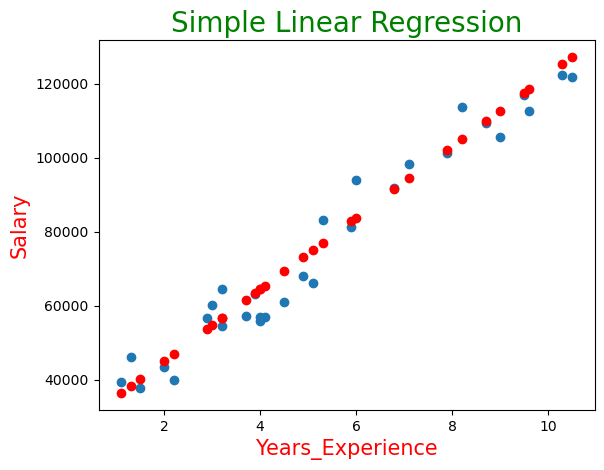

In [272]:
plt.scatter(df1.YearsExperience,df1.Salary)
plt.xlabel('Years_Experience',color='red',size=15)
plt.ylabel('Salary',color='red',size=15)
plt.title('Simple Linear Regression',size=20,color='green')
plt.scatter(df1.YearsExperience,lin_reg.predict(df1[['YearsExperience']]),color='red')
plt.show()

In [273]:
r2_score(y_test,y_pred)

0.9633431610802272

In [274]:
sse=(y_test-y_pred)**2
sse

,Salary
9,1.904968e+07
26,3.558216e+05
28,8.411677e+06
13,6.948030e+07
5,7.919653e+06
12,5.615646e+07
27,3.476553e+07
25,5.119252e+07


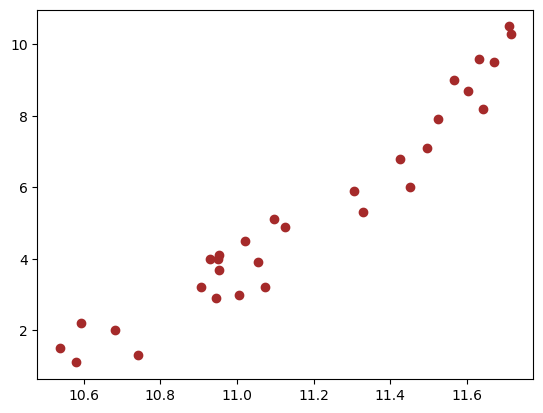

In [275]:
plt.scatter(x = np.log(df1['Salary']), y = df1['YearsExperience'], color = 'brown')
np.corrcoef(np.log(df1['Salary']),df1['YearsExperience'] )
plt.show()

In [276]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        17:55:05   Log-Likelihood:                -17.759
No. Observations:                  21   AIC:                             39.52
Df Residuals:                      19   BIC:                             41.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0612      0.348     -5.929      0.000      -2.789      -1.334
years          0.3330      0.052      6.387      0.000       0.224       0.442
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# square root transformation of data

In [277]:
model1=sfa.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)',data=df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           7.58e-19
Time:                        17:55:07   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on Data

In [278]:
model2=sfa.ols('np.log(Salary)~np.log(YearsExperience)',data=df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           7.40e-16
Time:                        17:55:08   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Building¶

In [281]:
model=sfa.ols(formula='Salary~YearsExperience',data=df1).fit()
model

# Model Testing

In [282]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [283]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [284]:
model.rsquared

0.9569566641435086

In [285]:
model.rsquared_adj

0.9554194021486339

In [286]:
from  sklearn.metrics import mean_squared_error

In [287]:
model1_pred_y=np.square(model1.predict(df1['YearsExperience']))
model2_pred_y=np.exp(model2.predict(df1['YearsExperience']))

In [288]:
model1_rmse=np.sqrt(mean_squared_error(df1['Salary'],model1_pred_y))
model2_rmse=np.sqrt(mean_squared_error(df1['Salary'],model2_pred_y))
print('model=',np.sqrt(model.mse_resid),'\n' 'model1=',model1_rmse,'\n' 'model2=',model2_rmse)


model= 5788.315051119394 
model1= 5960.647096174305 
model2= 7219.716974372787


In [289]:
rmse={'model':np.sqrt(model.mse_resid),'model1':model1_rmse, 'model2':model2_rmse}
min(rmse,key=rmse.get)

'model'

# Predicting values

In [290]:
predicted1=pd.DataFrame()
predicted1['YearsExperience']=df1.YearsExperience
predicted1['Salary']=df1.Salary
predicted1['Predicted_Salary_Hike']=pd.DataFrame(model.predict(predicted1.YearsExperience))
predicted1

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
